# ***TUGAS KELOMPOK METODE NUMERIK SPL***
Anggota: Shofwan Fikrul Huda(24060124130106)

Kelas: E
___

**A. Rumusan Masalah**

Sebuah kelas terdiri dari 2 kubu Emayor dan Eminor dengan jumlah masing masing 29 dan 10 mahasiswa. Seorang dosen menguji beberapa mahasiswa saja dan membagi jadi 2 kelompok. Kedua kelompok tersebut akan mengerjakan soal matematika dalam waktu 60 menit sebanyak-banyaknya.

Kelompok 1 terdiri dari 5 Eminor dan 2 Emayor dapat menyelesaikan 65 soal

Kelompok 2 terdiri dari 2 Eminor dan 7 Emayor dapat menyelesaikan 88 soal

Arga yang tidak mengerjakan soal tersebut merasa bosan lalu penasaran. Bagaimana jika seluruh Emayor dan Eminor bekerja sama berapa banyak soal yang dapat diselesaikan?

**B. Analisa kasus**

Diketahui bahwa dalam waktu 60 menit:
Kelompok 1 terdiri dari 5 Eminor dan 2 Emayor menyelesaikan 65 soal.
Kelompok 2 terdiri dari 2 Eminor dan 7 Emayor menyelesaikan 88 soal.

Misalkan:

$x$= jumlah soal yang dapat diselesaikan 1 Eminor dalam 60 menit

$y$ = jumlah soal yang dapat diselesaikan 1 Emayor dalam 60 menit


Dari informasi tersebut, kita dapat menyusun sistem persamaan linear dua variabel:

$5x+2y=65$

$2x+7y=88$

Langkah selanjutnya adalah menyelesaikan sistem persamaan ini untuk mencari nilai $x$ dan $y$, sehingga kita mengetahui produktivitas masing-masing individu dari kubu Eminor dan Emayor.

Setelah diketahui $x$ dan $y$, kita bisa menghitung total soal yang dapat diselesaikan jika seluruh anggota bekerja sama, yaitu:

$Total soal=10x+29y$

**C. Penyelesaian**

Kita akan menyelesaikan persamaan dengan menggunakan metode Relaksasi. Metode relaksasi (relaxation methods) adalah metode untuk mempercepat kekonvergenan dari solusi yang dihasilkan oleh metode iteratif untuk SPL. Bedasarkan ukuran faktor relaksasi $w$, metode ini dibagi jadi 2 jenis. *under relaxation* jika $0<w<1$ dan *over relaxaion* $1<w<2$. jika $w=1$ adalah metode *gauss seidel*.

Untuk sembarang nilai omega, rumus metode relaksasi sebagai modifikasi Gauss-Seidel bisa dituliskan sebagai berikut:

$
x_i^{(k)} = (1 - \omega) x_i^{(k-1)} + \frac{\omega}{a_{ii}}
\left[
    - \sum_{j=1}^{i-1} a_{ij} x_j^{(k)}
    - \sum_{j=i+1}^{n} a_{ij} x_j^{(k-1)}
    + b_i
\right], \quad i = 1, 2, \ldots, n
$

Pada kasus ini, kita akan mengiterasi semua omega dengan selisih 0.1. KIta akan menyelesaikan menggunakan python. Langkah pertama adalah mengimport library *numpy*, *matplotlib*, dan *tabulate*.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tabulate as tbl

Selanjutnya membuat fungsi untuk metode relaksasi. Fungsi ini akan mengiterasi sebanyak 1000 kali, tetapi akan berhenti jika sudah menyentuh batas toleransi $10^{-4}$.

In [22]:
def relaxation_method(A, b, w, tol=1e-4, max_iterations=5000):
    # Kamus
    n = len(A) # Banyak persamaan atau bisa disebut juga banyak variabel
    x = np.zeros(n) # Untuk nilai x_(k-1)
    # Melakukan iterasi sampai 1000
    for k in range(max_iterations):
      x_new = np.copy(x) # Untuk nilai x_(k)
      # Mengoperasikan rumus relaksasi
      for i in range(n):
        sigma1 = sum(A[i][j] * x_new[j] for j in range(i))
        sigma2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x_new[i] = (1 - w) * x[i] + (w / A[i][i]) * (b[i] - sigma1 - sigma2)

      if np.linalg.norm(np.dot(A, x_new) - b) < tol: # Mengecek kekonvergenan garis
        break
      x = x_new
    return x, k + 1  # Mengembalikan nilai x dan jumlah iterasi

Deklarasi matriks sistem persamaan linear dua variabel

In [16]:
# Membuat array persamaan kasus
A = np.array([[5, 2], [2, 7]])
b = np.array([65, 88])



Deklararasi array untuk omega mulai dari $0.1$ hingga $1.9$ dengan $h=0.1$. Menjalankan fungsi relaksasi dengan seluruh omega yang telah dideklarasikan. Mengembalikan hasil visual Pengaruh banyak iterasi terhadap perubahan omega.

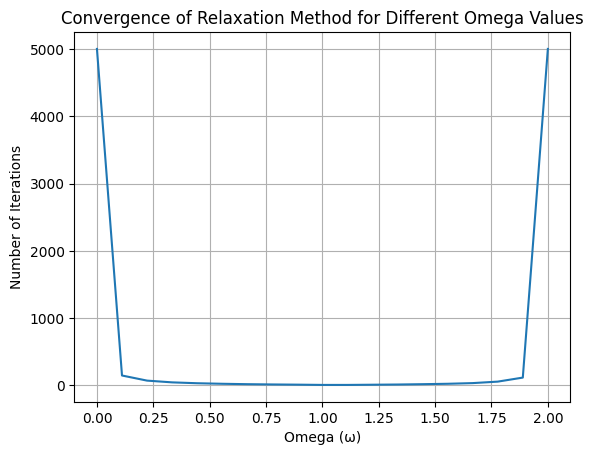

In [23]:
# Jangkauan nilai omega untuk test
omega_values = np.linspace(0.0, 2.0, 19)

iterations_list = []
for omega in omega_values:
    solution, iterations = relaxation_method(A, b, omega)
    iterations_list.append(iterations)

# Pembuatan grafik
plt.plot(omega_values, iterations_list)
plt.xlabel("Omega (ω)")
plt.ylabel("Number of Iterations")
plt.title("Convergence of Relaxation Method for Different Omega Values")
plt.grid(True)
plt.show()



Mengembalikan data omega dan banyak iterasi yang dibutuhkan untuk menyelesaikan spldv.

In [24]:
# Hasil penghitungan
data = []
for i in range(len(omega_values)):
    data.append([omega_values[i], iterations_list[i]])
headers = ["Omega", "Number of Iterations"]
print(tbl.tabulate(data, headers=headers, tablefmt="grid"))



+----------+------------------------+
|    Omega |   Number of Iterations |
+==========+========================+
| 0        |                   5000 |
+----------+------------------------+
| 0.111111 |                    147 |
+----------+------------------------+
| 0.222222 |                     71 |
+----------+------------------------+
| 0.333333 |                     45 |
+----------+------------------------+
| 0.444444 |                     32 |
+----------+------------------------+
| 0.555556 |                     24 |
+----------+------------------------+
| 0.666667 |                     18 |
+----------+------------------------+
| 0.777778 |                     14 |
+----------+------------------------+
| 0.888889 |                     11 |
+----------+------------------------+
| 1        |                      7 |
+----------+------------------------+
| 1.11111  |                      7 |
+----------+------------------------+
| 1.22222  |                     10 |
+----------+

Mengembalikan berapa soal yang dapat diselesaikan mahasiswa kelas tersebut dan berapa soal yang dapat dikerjakan jika satu kelas bekerja sama beserta galat relatif dari nilai sebenarnya.

In [19]:
# Hasil akhir
galat1= (np.linalg.solve(A, b)[0]-solution[0])*100/np.linalg.solve(A, b)[0]
galat2= (np.linalg.solve(A, b)[1]-solution[1])*100/np.linalg.solve(A, b)[1]
galat3= (10*np.linalg.solve(A, b)[0]+29*np.linalg.solve(A, b)[1]-(10*solution[0]+29*solution[1]))*100/(10*np.linalg.solve(A, b)[0]+29*np.linalg.solve(A, b)[1])
tabel = [["Eminor", solution[0], f"{galat1}%"],
         ["Emayor", solution[1], f"{galat2}%"],
         ["Jika semua bekerja sama", 10*solution[0]+29*solution[1],f"{galat3}%"]

         ]
headers = ["kubu", "solved", "galat relatif"]
print(tbl.tabulate(tabel, headers=headers, tablefmt="grid"))

+-------------------------+-----------+--------------------------+
| kubu                    |    solved | galat relatif            |
+=========================+===========+==========================+
| Eminor                  |   9.00002 | -0.00026061275539588123% |
+-------------------------+-----------+--------------------------+
| Emayor                  |   9.99999 | 7.532028092782639e-05%   |
+-------------------------+-----------+--------------------------+
| Jika semua bekerja sama | 380       | -4.24280660569677e-06%   |
+-------------------------+-----------+--------------------------+


**D. Kesimpulan (opsional)**